# Comparison of 3 pointers and 2 pointers in NBA basketball

With the ongoing evolution of nba basketball, there has been some controversy as to how the game should be played. While the older generation may appreciate a classic Kareem Abdul-Jabbar sky hook, some of the newer fans may find Steph Curry's unbelievable half court attempts to be the optimal basketball experience. My goal is to simply run simulations of two different hypothetical nba teams with extreme play styles: one of which only shoots 2 pointers and the other 3 pointers. Afterwards, I will interpret the results.

Unlike some of my previous projects pertaining to genetic data analysis, this project will be light in nature. Basketball is a passion of mine, and I do like to dive into some simulation analysis.

Importing packages as well as initializing parameters.

In [20]:
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import Counter
import scipy.stats as stats

#I created my own values that are consistent with historical nba data. I want the expected value of both 3 point shooting
#teams and 2 point shooting teams to be the same.

tmax=100 #possessions
n0=0 # initial conditions, same for both values of r
trp = (1/3) #three point percentage
twp = (1/2) #two point percentage
gam = 1000 #number of games

In [21]:
##### Three pointers

r=3
n=np.zeros(tmax+1) # initialize arrays
n[0]=n0 # initial population level

##### Two pointers

f=2
m=np.zeros(tmax+1) # initialize arrays
m[0]=n0 # initial population level

In [22]:
#final data array as well as games won array

final = np.zeros((gam, 2))
final_two = np.zeros((gam))
final_three = np.zeros((gam))

gwon = np.zeros(gam)#games won

Conducting a for loop to simulate nba games between the 2 point team and the 3 point team.

In [23]:
#Iterations

def simulate(games, percent, shot, possesions, array, final_score):
    for i in range(gam):    

        for t in range(tmax):
            s = random.uniform(0,1)
            if s < (percent):
                p = 1
            else:
                p = 0

            Fn = p*shot + array[t]
            array[t+1] = Fn
            
        final_score[i] = array[-1]

    return final_score

In [24]:
final_three = simulate(games = gam, percent = trp, shot = r, possesions = tmax, array = n, final_score = final_three)

In [25]:
final_two = simulate(games = gam, percent = twp, shot = f, possesions = tmax, array = m, final_score = final_two)

In [26]:
final[:, 0] = final_three
final[:, 1] = final_two
final

array([[105., 104.],
       [ 99., 116.],
       [111., 104.],
       ...,
       [108., 100.],
       [120.,  88.],
       [ 96., 112.]])

Introducing basic statistics for both teams. Note the greater variance for the 3 point team compared with the 2 point team.

In [27]:
#Elementary Stats

print("3 pointers average score:", np.mean(final[:,0]))
print("3 pointers score standard deviation", np.std(final[:,0]))
print("2 pointers average score:", np.mean(final[:,1]))
print("2 pointers score deviation", np.std(final[:,1]))

3 pointers average score: 99.663
3 pointers score standard deviation 14.118549181838763
2 pointers average score: 99.75
2 pointers score deviation 9.94572772601382


Number of games won should be close to equal between the two teams, since the expected value is equal.

$$
E[TeamThreePointer] = 3*Three point Percentage*Possessions = E[TeamTwoPointer] = 2*Two point Percentage*Possessions
$$

In [28]:
#Determining Games won

for i in range(gam):
    if final[i, 0] > final[i, 1]:
        gwon[i] = 3
    if final[i, 0] < final[i, 1]:
        gwon[i] = 2

#print(gwon)
#3 means 3 pointers won, 2 means 2 pointers won, 0 means a draw
#Draws do not exist in NBA games, since that would result in overtime play, but for the sake of simplicity,
#we will assume that draws do exist.

print(Counter(gwon))

Counter({2.0: 502, 3.0: 481, 0.0: 17})


Plots displaying the difference in score between the two teams. As noted before, it is interesting that the variance of the final score is greater for the 3 point team compared with the 2 point team.

Text(0.5, 1.0, '2d Histogram')

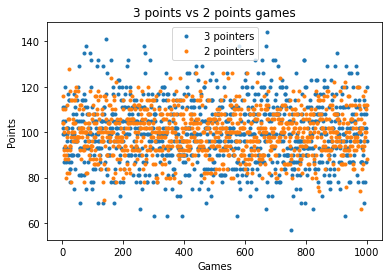

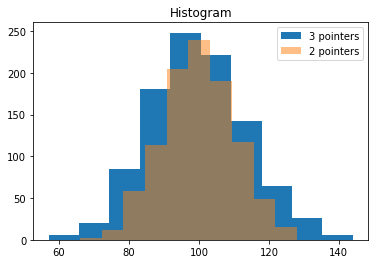

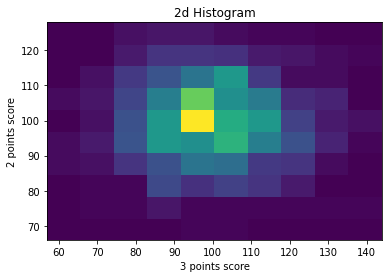

In [29]:
#Plots

gs = np.arange(1, gam+1, 1)#game step

plt.figure(1)

plt.plot(gs, final[:,0], '.')
plt.plot(gs, final[:,1], '.')
plt.legend(("3 pointers", "2 pointers"))
plt.title("3 points vs 2 points games")
plt.ylabel("Points")
plt.xlabel("Games")

plt.figure(2)

plt.hist(final[:,0])
plt.hist(final[:,1], alpha = 0.5)
plt.legend(("3 pointers", "2 pointers"))
plt.title("Histogram")

plt.figure(3)

plt.hist2d(final[:,0], final[:,1])
plt.xlabel("3 points score")
plt.ylabel("2 points score")
plt.title("2d Histogram")

Conducted a Barlett test comparing the variances of the two populations. I chose this test over the F-test since the F-test is sensitive to departures of normality. Since the simulated data may not follow a perfect normal distribution (as seen above), I believe using a Barlett test would be safer.

As we can see, the p-value is extremely low, indicating a significant difference between the variances of the two populations.

In [30]:
stats.bartlett(final[:,0], final[:,1])

BartlettResult(statistic=120.13044304996068, pvalue=5.923472611634802e-28)

Since the variance of the 3 point team is significantly larger than the 2 point team, one may assume that the difference in 
final score between two 3 point shooting teams is larger than two 2 point shooting teams.

As such, I will continue to run simulations but between two 2 point shooting teams and two 3 point shooting teams.

In [31]:
#Final Difference of Scores of the Three Point Shooting Teams (1st 3 columns) and Two Point Shooting Teams (Last 3 Columns)

final_difference = np.zeros((gam, 6))

In [32]:
final_difference[:,0] = simulate(games = gam, percent = trp, shot = r, possesions = tmax, array = n, final_score = final_three)
final_difference[:,1] = simulate(games = gam, percent = trp, shot = r, possesions = tmax, array = n, final_score = final_three)
final_difference[:,2] = final_difference[:,0] - final_difference[:,1]#Difference of Scores between 3-Point Shooting Teams

final_difference[:,3] = simulate(games = gam, percent = twp, shot = f, possesions = tmax, array = m, final_score = final_two)
final_difference[:,4] = simulate(games = gam, percent = twp, shot = f, possesions = tmax, array = m, final_score = final_two)
final_difference[:,5] = final_difference[:,3] - final_difference[:,4]#Difference of Scores between 2-point Shooting Teams

final_difference

array([[ 87., 111., -24.,  88., 100., -12.],
       [ 96.,  81.,  15., 114.,  92.,  22.],
       [ 99.,  96.,   3., 106., 102.,   4.],
       ...,
       [111., 102.,   9.,  96.,  94.,   2.],
       [ 96.,  90.,   6., 108.,  94.,  14.],
       [ 99.,  87.,  12.,  94., 112., -18.]])

Plotting the difference of scores between 3 point shooting teams and 2 point shooting teams.

Text(0.5, 1.0, 'Histogram')

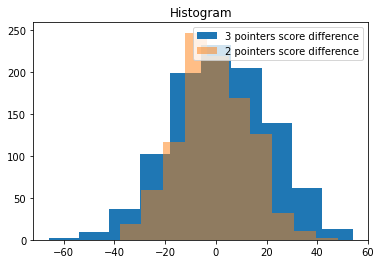

In [33]:
plt.hist(final_difference[:,2])
plt.hist(final_difference[:,5], alpha = 0.5)
plt.legend(("3 pointers score difference", "2 pointers score difference"))
plt.title("Histogram")

### Discussion

Many of the simulation analyses conducted here could easily be obtained through mathematical expression. Nevertheless, simulating the data gives us a visual representation of our final inferences. That being said, the most striking result is the fact that the variance of the final score for 3 point shooting teams is significantly greater than for 2 point shooting teams. Given this greater variance, one may assume that the variance of the difference in final scores between teams that solely shoot 3 pointers would be greater than those that solely shoot 2 pointers, which is displayed in the final graph above. This can also be represented in the following equation assuming independence:

$$
Var(X-Y) = Var(X) + Var(Y)
$$

Since we know that the variance of 3 point shooting is larger than 2 point shooting, we can deduce from the equation that the variance of the final scores will be larger if the individual teams shoot more 3 pointers than 2 pointers, despite the expected value of the final scores being the same for both teams (as illustrated above).

This begs the question, what is more exciting to watch, a close contest between two teams exchanging slow mid-range jumpers and jump hooks, or an explosive barrage of three pointers that will more likely result in a blowout? I cannot answer this question. However, I do believe that the NBA is a sport of trends. Perhaps what is most exciting is the oscillation between one play style and the other as time goes on. This will keep the game fresh for long term nba fans, and we have seen this cycle before. During the 1970s, basketball was played at a high pace, with the score easily surpassing the 100s. When the 1990's rolled around, the game started to slow down. During the 2000's, it was not uncommon to see scores like 74-53 like the infamous Pistons-Nuggets game in 2002. Right now, it is clear that we are in an upward trajectory where high scoring games with many three pointers are the norm. One day, when the average nba fan becomes less exhilarated by these scorelines and style of play, we may see a return to "old-school" slow basketball.